# Data Visualization Task
This notebook contains some EDA actions on the collected data from 3 topic sources: weather, (fake) registered users, and cryptocurrency price (BTC & ETH). Please make sure you let the pipeline run for long enough time to have meaningful visualization

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *

In [29]:
df_faker = getFakerDF()
df_wikipedia = getWikipediaDF()
df_weather = getWeatherDF()

In [30]:
df_weather.head()

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind
0,"Singapore, SG",2023-12-04 14:10:32,broken clouds,303.920013,80.0,1010.0,1701643993,1701687372,300.600006,301.100006,299.170013,2.57
1,"Singapore, SG",2023-12-04 14:11:32,broken clouds,303.920013,80.0,1010.0,1701643993,1701687372,300.600006,301.100006,299.170013,2.57
2,"Singapore, SG",2023-12-04 14:12:33,broken clouds,303.920013,80.0,1010.0,1701643993,1701687372,300.600006,301.100006,299.170013,2.57
3,"Singapore, SG",2023-12-04 14:13:33,broken clouds,304.429993,77.0,1011.0,1701643993,1701687372,300.989990,301.070007,299.170013,3.09
4,"Singapore, SG",2023-12-04 14:14:34,broken clouds,304.429993,77.0,1011.0,1701643993,1701687372,300.989990,301.070007,299.170013,3.09


In [31]:
df_wikipedia.head()

,id,bot,length_new,length_old,revision_new,revision_old,timestamp,title,type,user
0,2371240942,True,4929.0,842.0,8.278865e+08,8.278186e+08,2023-12-04 21:13:06,File:UNCTAD at COP28 – 2 December 2023 (533707...,edit,BotMultichillT
1,52693195,False,12274.0,10527.0,1.206153e+07,1.206152e+07,2023-12-04 21:13:05,Доминик Тийм,edit,MICHELANGELO
2,2371240928,False,NaN,NaN,NaN,NaN,2023-12-04 21:13:04,Category:Self-published work,categorize,Supanut Arunoprayote
3,1701004862,False,1734.0,1735.0,1.188296e+09,1.182790e+09,2023-12-04 21:13:05,Adeka,edit,FromCzech
4,2373037100,False,NaN,NaN,NaN,NaN,2023-12-06 21:36:21,Category:Content made available through Wikime...,categorize,Alicia Fagerving (WMSE)


In [32]:
df_faker.head()

,name,phone_number,address,city,company,country,credit_card_number,date_time,email,gender,job,year
0,Ricky Ramirez,877-695-3531x2656,"0525 Jack Shoals Suite 917\nPort Cynthiaburgh,...",Rodriguezland,"Wall, Reid and Guzman",Malawi,3553909986034731,1996-01-27 15:54:09,julielane@example.org,Female,Teaching laboratory technician,1981
1,Jerry Williams,5332849428,"97815 Tiffany Parkway Suite 416\nPriceville, M...",Kathrynview,"Garcia, Johnson and Acosta",Libyan Arab Jamahiriya,6011146552850823,1984-01-30 21:14:59,robertthompson@example.org,Female,Conference centre manager,2010
2,Scott Kennedy,+1-686-614-6667x306,"378 Bailey Place\nLake Brian, DC 46820",South Andrea,Weaver LLC,Holy See (Vatican City State),3527512739818740,1996-04-23 05:53:02,awilson@example.com,Male,Media planner,2011
3,Jean Lewis,804.986.3847,"158 Mclaughlin Cliff\nNathantown, WI 56896",Jasontown,"Wood, Zavala and Hughes",Bouvet Island (Bouvetoya),6521372185899465,1979-11-03 22:22:51,liupamela@example.org,Other,Jewellery designer,2009
4,Richard Mclean,001-488-968-0012x458,35319 Moore Landing Suite 590\nMartinezborough...,Port Clintonview,Roberts-Maldonado,Svalbard & Jan Mayen Islands,38228354811435,1974-07-02 00:59:59,robinscott@example.com,Male,General practice doctor,1984


## Weather Analysis

In [33]:
df_weather.dtypes

location                object
forecastdate    datetime64[ns]
description             object
feels_like             float64
humidity               float64
pressure               float64
sunrise                  int64
sunset                   int64
temp                   float64
temp_max               float64
temp_min               float64
wind                   float64
dtype: object

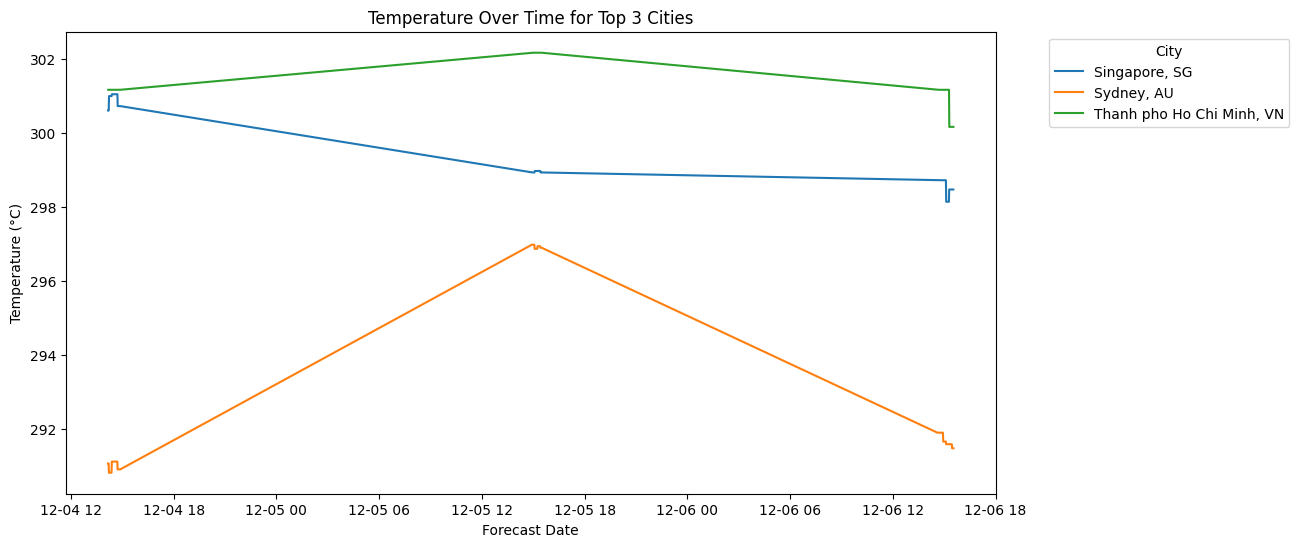

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the temperature over time for the top 3 cities
sns.lineplot(data=df_weather, x='forecastdate', y='temp', hue='location')

# Customize the plot
plt.title('Temperature Over Time for Top 3 Cities')
plt.xlabel('Forecast Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipykernel_27/3038382094.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weather, x='location', y='wind', palette='Set3')


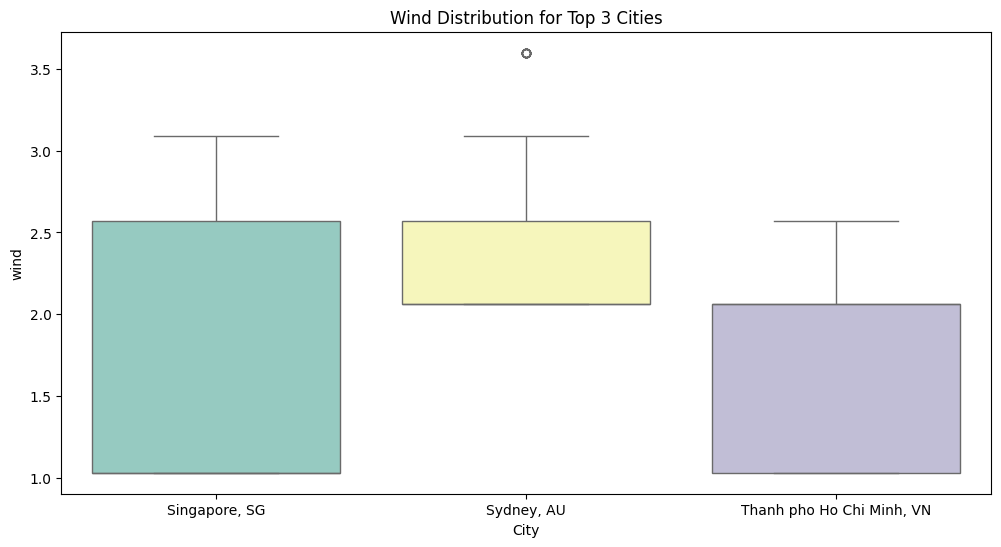

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a box plot of temperature distribution for each city
sns.boxplot(data=df_weather, x='location', y='wind', palette='Set3')

# Customize the plot
plt.title('Wind Distribution for Top 3 Cities')
plt.xlabel('City')
plt.ylabel('wind')
plt.show()


/tmp/ipykernel_27/507245679.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_temp_by_city.index, y=average_temp_by_city.values, palette='coolwarm')


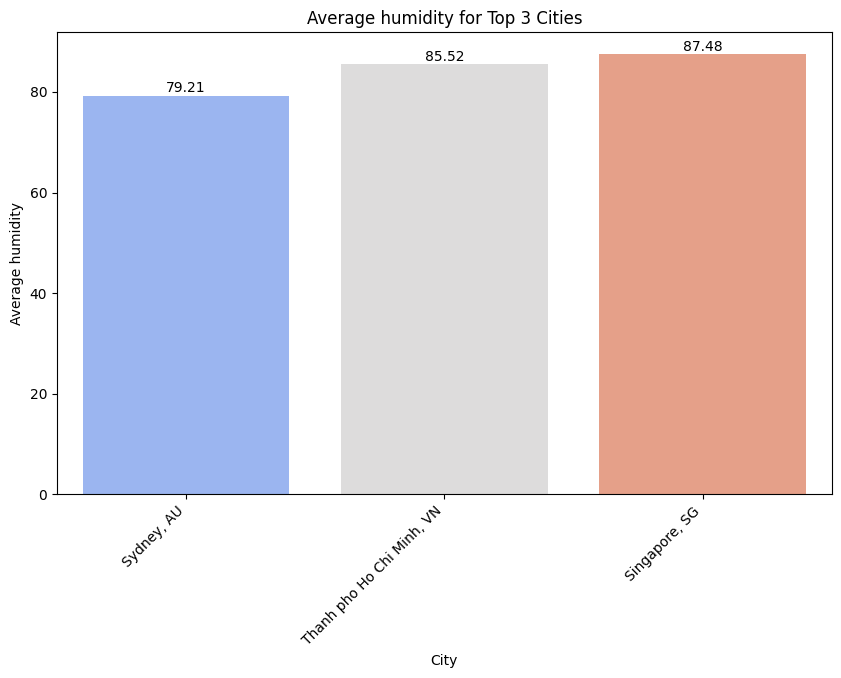

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


# Find the average temperature for each of the top 3 cities
average_temp_by_city = df_weather.groupby('location')['humidity'].mean().sort_values()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot of average temperatures for the top 3 cities
sns.barplot(x=average_temp_by_city.index, y=average_temp_by_city.values, palette='coolwarm')

# Display numeric values on top of each bar
for i, value in enumerate(average_temp_by_city.values):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Customize the plot
plt.title('Average humidity for Top 3 Cities')
plt.xlabel('City')
plt.ylabel('Average humidity')
plt.xticks(rotation=45, ha='right')
plt.show()


## Registered Faker Analysis

/tmp/ipykernel_27/3717841081.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='count', data=credit_card_counts, palette='pastel')


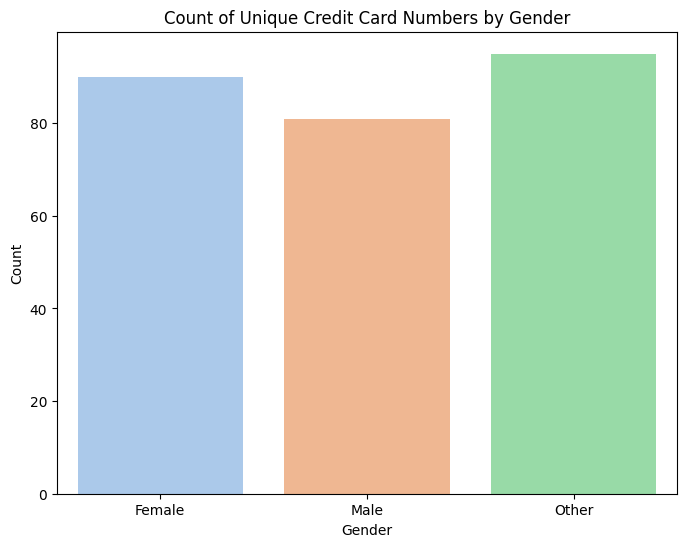

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of unique credit card numbers by gender
credit_card_counts = df_faker.groupby('gender')['credit_card_number'].nunique().reset_index(name='count')

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the count of unique credit card numbers by gender
sns.barplot(x='gender', y='count', data=credit_card_counts, palette='pastel')

# Customize the plot
plt.title('Count of Unique Credit Card Numbers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_27/1419252497.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10_jobs, x='job', y='year', palette='Set3')


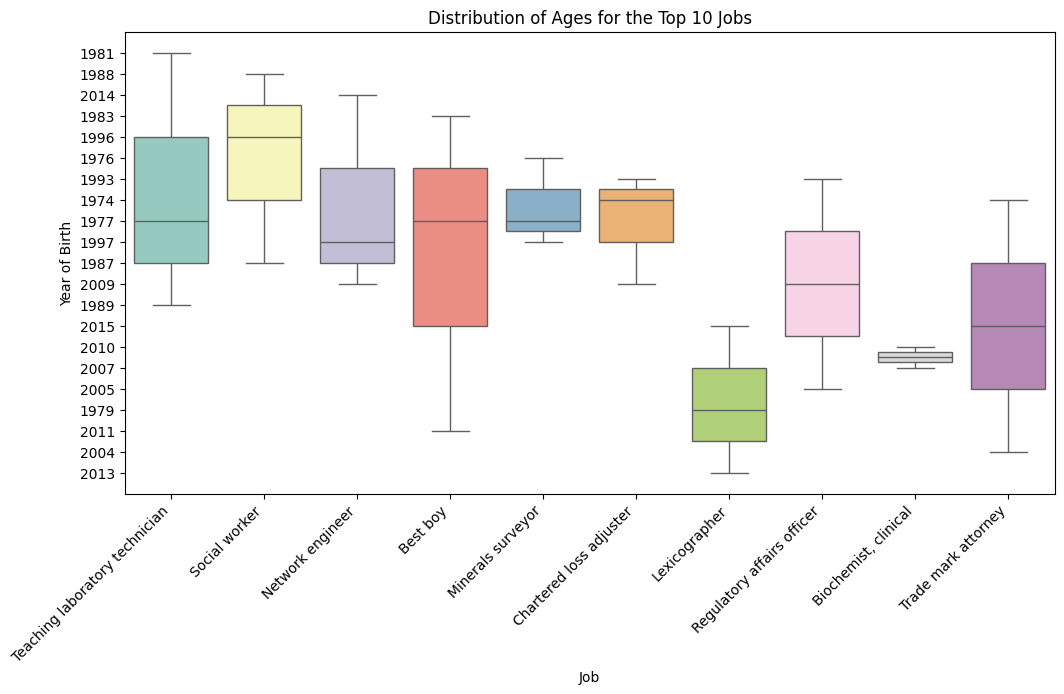

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the top 10 jobs
top_10_jobs = df_faker['job'].value_counts().nlargest(10).index
df_top_10_jobs = df_faker[df_faker['job'].isin(top_10_jobs)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot distribution of ages for the top 10 jobs
sns.boxplot(data=df_top_10_jobs, x='job', y='year', palette='Set3')

# Customize the plot
plt.title('Distribution of Ages for the Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Year of Birth')
plt.xticks(rotation=45, ha='right')
plt.show()


## Wikipedia Analysis

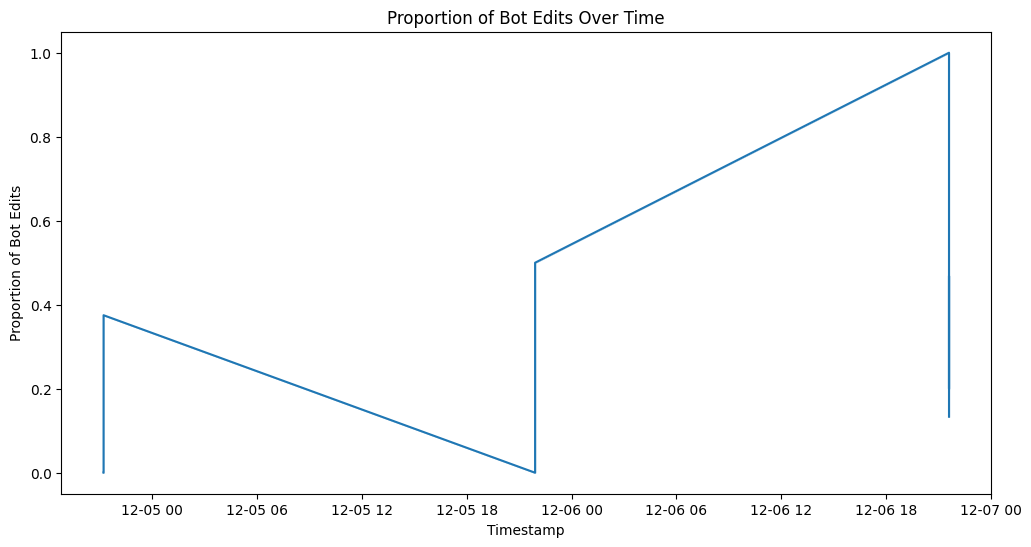

In [39]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Calculate the proportion of bot edits over time
df_wikipedia['bot_proportion'] = df_wikipedia.groupby('timestamp')['bot'].transform('mean')

# Plot the proportion of bot edits over time
sns.lineplot(data=df_wikipedia, x='timestamp', y='bot_proportion')

# Customize the plot
plt.title('Proportion of Bot Edits Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Proportion of Bot Edits')
plt.show()


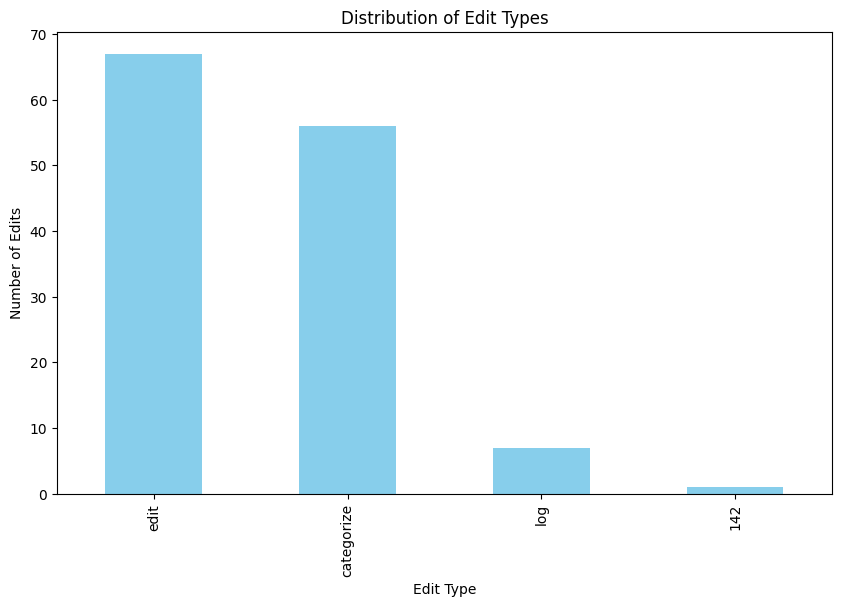

In [40]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Count the number of edits for each type
edit_type_counts = df_wikipedia['type'].value_counts()

# Plot a bar chart of edit types
edit_type_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Distribution of Edit Types')
plt.xlabel('Edit Type')
plt.ylabel('Number of Edits')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


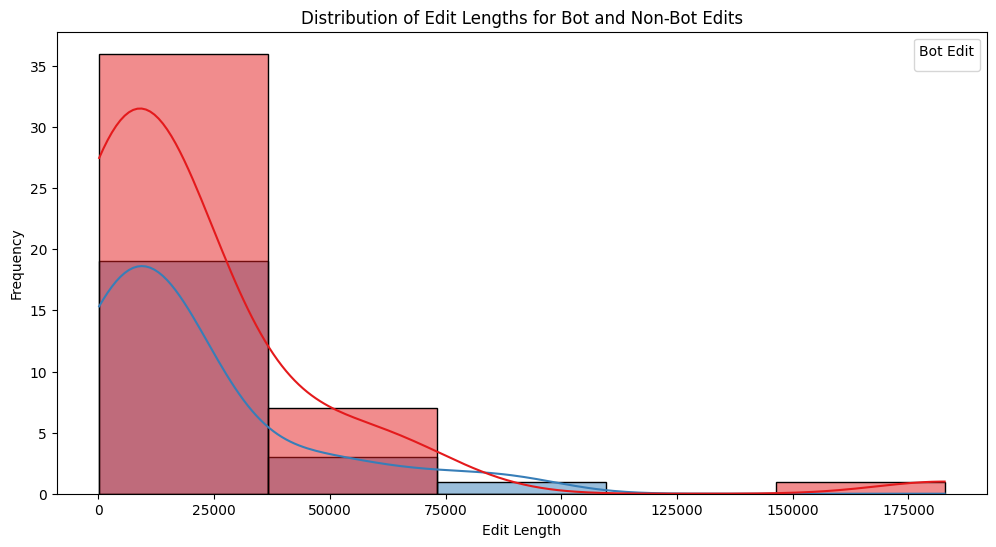

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot distribution of edit lengths for bot and non-bot edits
sns.histplot(df_wikipedia, x='length_new', hue='bot', bins=5, kde=True, palette='Set1')

# Customize the plot
plt.title('Distribution of Edit Lengths for Bot and Non-Bot Edits')
plt.xlabel('Edit Length')
plt.ylabel('Frequency')
plt.legend(title='Bot Edit')
plt.show()
